<a href="https://colab.research.google.com/github/shiyasAli/Health-insurance-cross-sell-prediction/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path='/content/drive/MyDrive/Colab Notebooks/Almabetter/Supervised ML_Capastone/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df=pd.read_csv(file_path)

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [28]:
continuous_variables=['Age','Annual_Premium','Vintage','Region_Code','Policy_Sales_Channel']
categorical_variables=[variable for variable in df.columns if (variable not in continuous_variables and variable!= 'id') ]
categorical_variables

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response']

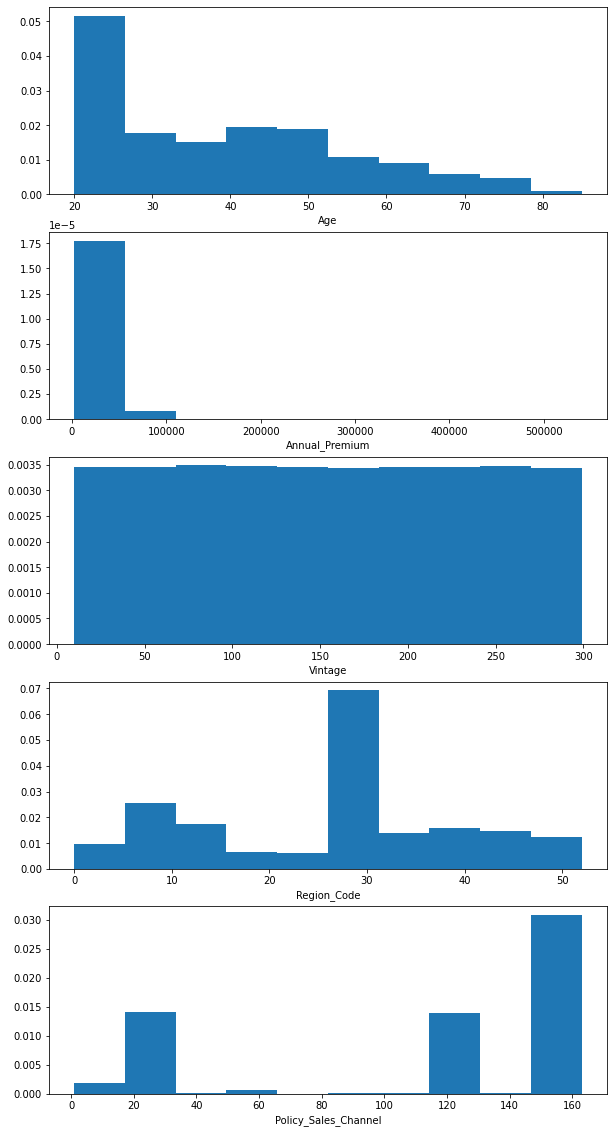

In [36]:
fig,ax=plt.subplots(len(continuous_variables),1)
plt.rcParams['figure.figsize']=(10,20)
for index,feature in enumerate(continuous_variables):
  ax[index].hist(df[feature],density=True)
  ax[index].set_xlabel(feature)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

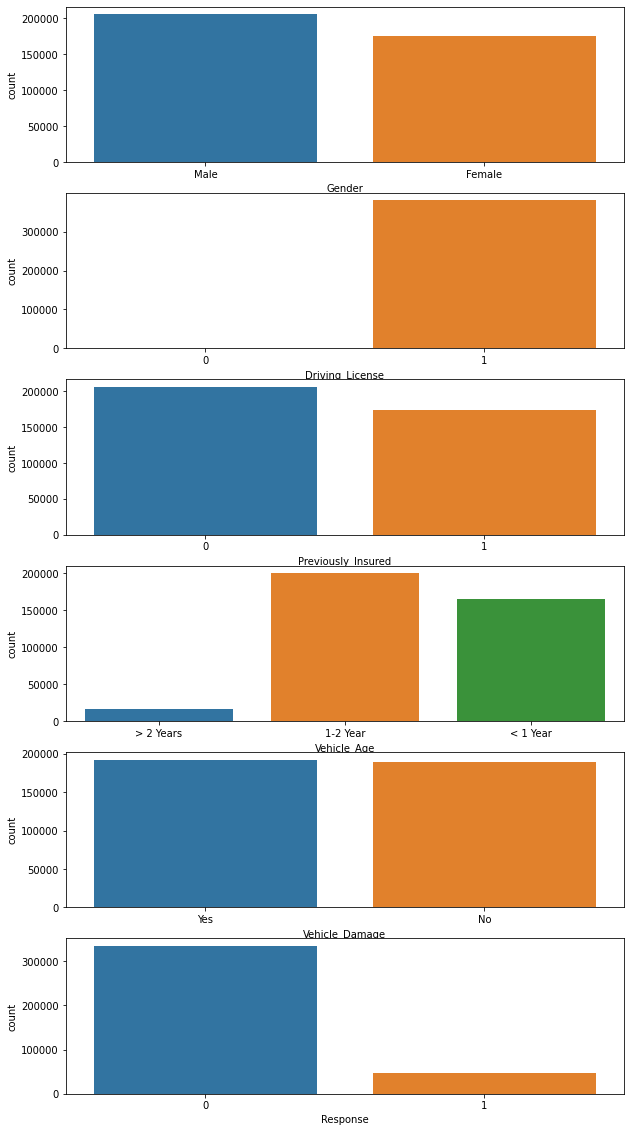

In [37]:

for index,feature in enumerate (categorical_variables):
  plt.subplot(len(categorical_variables),1,index+1)
  sns.countplot(feature,data=df)
fig.show()


In [38]:
(df['Driving_License']==1).sum()/df['Driving_License'].count()

0.9978693759528114

In [39]:
df.drop(['id','Driving_License'],inplace=True,axis=1)

In [40]:
y=df['Response']

In [10]:
y.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [41]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

Number of people interested : 46710
Number of people not interested : 334399


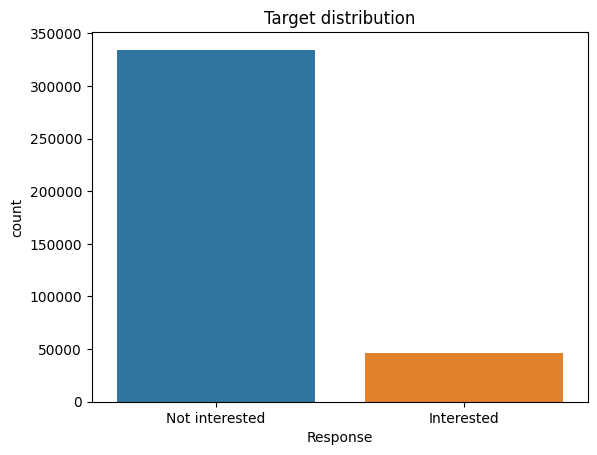

In [42]:
N,Y = y.value_counts()
print('Number of people interested : {}'.format(Y))
print('Number of people not interested : {}'.format(N))
ax=sns.countplot(x='Response',data=df)
ax.set_xticklabels(['Not interested','Interested'])
ax.set_title('Target distribution')
plt.show()

In [43]:
independent_numerical_features=[feature for feature in df.describe().columns if feature!='Response']
independent_numerical_features


['Age',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [44]:
df_independent_numerical=df[independent_numerical_features]

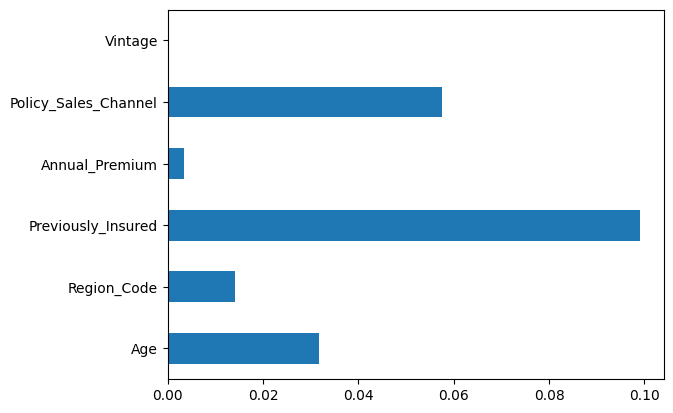

In [45]:
importance=mutual_info_classif(df_independent_numerical,y)
feature_importance=pd.Series(importance,df_independent_numerical.columns)
feature_importance.plot(kind='barh')

In [46]:
df_independent_numerical_normalized=(df_independent_numerical-df_independent_numerical.mean())/df_independent_numerical.std()

In [47]:
Data=pd.concat([y,df_independent_numerical_normalized],axis=1)

In [48]:
Data=pd.melt(frame=Data,id_vars='Response',var_name='Features',value_name='Value')

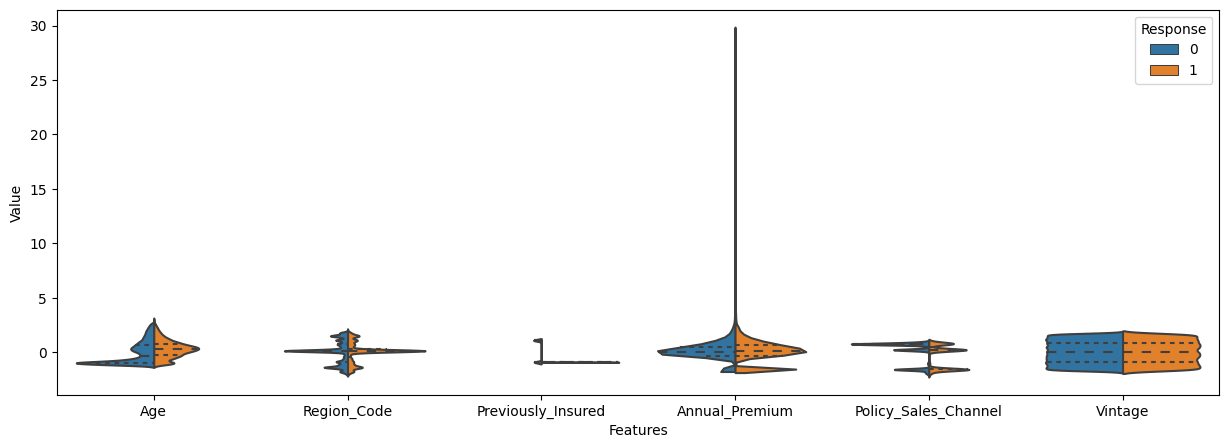

In [49]:
plt.figure(figsize=[15,5])
ax=sns.violinplot(x='Features',y='Value',hue='Response',data=Data,split=True,inner='quart')
plt.show()

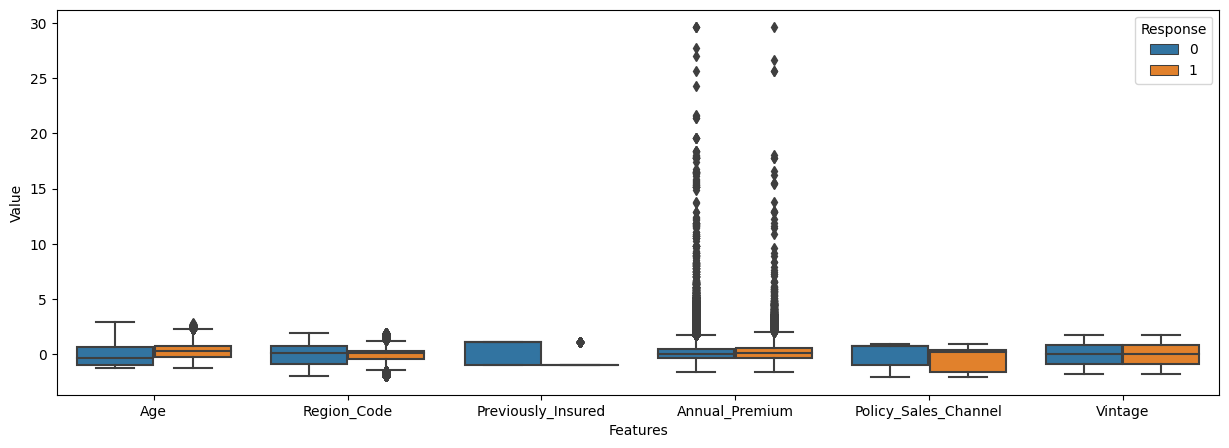

In [50]:
plt.figure(figsize=[15,5])
ax=sns.boxplot(x='Features',y='Value',hue='Response',data=Data)
plt.show()

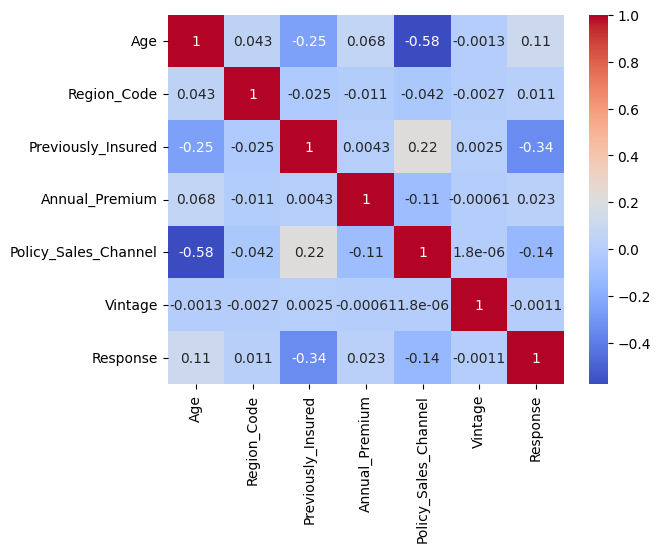

In [51]:
ax=sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

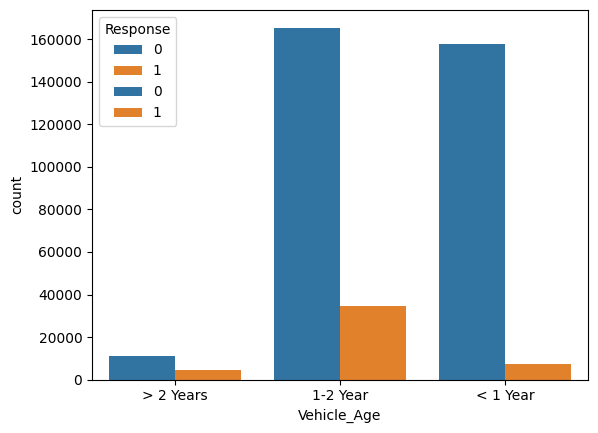

In [29]:
ax=sns.countplot(x='Vehicle_Age',hue='Response',data=df)
plt.show()

In [35]:
data_crosstab=pd.crosstab(df['Response'],df['Vehicle_Age'],margins=False)
data_crosstab

Vehicle_Age,1-2 Year,< 1 Year,> 2 Years
Response,,,
0,165510,157584,11305
1,34806,7202,4702


In [36]:
Chi2,p,dof,expected=scipy.stats.chi2_contingency(data_crosstab)

In [37]:
p

0.0

In [38]:
expected

array([[175764.59775025, 144589.27397149,  14045.12827826],
       [ 24551.40224975,  20196.72602851,   1961.87172174]])

In [39]:
data_crosstab=pd.crosstab(df['Response'],df['Vehicle_Damage'],margins=False)
data_crosstab
Chi2,p,dof,expected=scipy.stats.chi2_contingency(data_crosstab)
print(p)

0.0


In [40]:
expected

array([[165568.78400668, 168830.21599332],
       [ 23127.21599332,  23582.78400668]])

In [16]:
data_crosstab=pd.crosstab(df['Response'],df['Gender'],margins=False)
data_crosstab
Chi2,p,dof,expected=scipy.stats.chi2_contingency(data_crosstab)
print(p)

7.665800628415621e-230


In [17]:
relevent_indpendent_features=['Age','Previusly_Insured','Policy_Sales_channel','Vehicle_age','Vehicle_Damage','Gender']

In [52]:
df['Vehicle_Damage']=df['Vehicle_Damage'].apply(lambda x : 1 if x=='Yes' else 0)
df['Gender']=df['Gender'].apply(lambda x : 1 if x=='Male' else 0)

In [36]:
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1,76,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1,47,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1,21,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,0,29,41.0,1,< 1 Year,0,27496.0,152.0,39,0


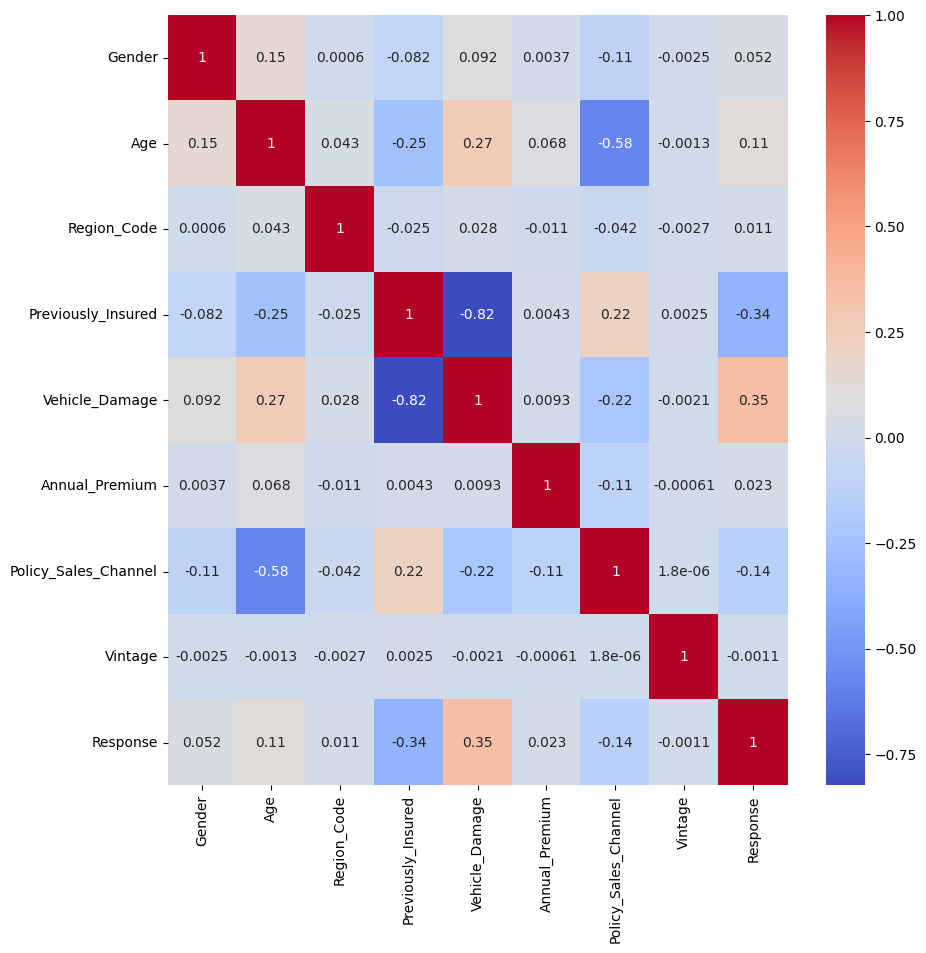

In [53]:
plt.figure(figsize=(10,10))
ax=sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [54]:
independent_numerical_features=[feature for feature in df.columns if feature not in ['Vehicle_Age','Response']]
df_independent_numerical=df[independent_numerical_features]

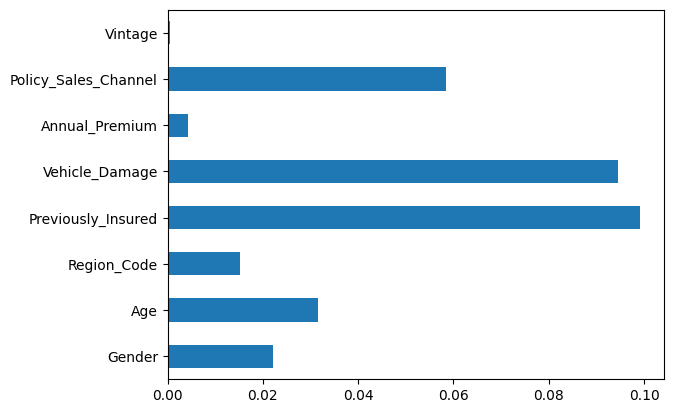

In [55]:
importance=mutual_info_classif(df_independent_numerical,y)
feature_importance=pd.Series(importance,df_independent_numerical.columns)
feature_importance.plot(kind='barh')

In [42]:
relevent_indpendent_features=['Age','Previusly_Insured','Policy_Sales_channel','Vehicle_age','Vehicle_Damage','Gender']

In [56]:
enc=OneHotEncoder(handle_unknown='ignore')
enc_df=pd.DataFrame(enc.fit_transform(df[['Vehicle_Age']]).toarray())
enc_df.rename(columns={0:'1-2 Years',1:'<1 Year',2:'>2 Year'},inplace=True)
enc_df

,1-2 Years,<1 Year,>2 Year
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
381104,1.0,0.0,0.0
381105,0.0,1.0,0.0
381106,0.0,1.0,0.0
381107,0.0,0.0,1.0


In [57]:
df=pd.concat([df,enc_df],axis=1)
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,1-2 Years,<1 Year,>2 Year
0,1,44,28.0,0,> 2 Years,1,40454.0,26.0,217,1,0.0,0.0,1.0
1,1,76,3.0,0,1-2 Year,0,33536.0,26.0,183,0,1.0,0.0,0.0
2,1,47,28.0,0,> 2 Years,1,38294.0,26.0,27,1,0.0,0.0,1.0
3,1,21,11.0,1,< 1 Year,0,28619.0,152.0,203,0,0.0,1.0,0.0
4,0,29,41.0,1,< 1 Year,0,27496.0,152.0,39,0,0.0,1.0,0.0


In [58]:
df.drop(['Vehicle_Age','Region_Code','Vintage','Annual_Premium'],axis=1,inplace=True)

In [59]:
df.head()

,Gender,Age,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Response,1-2 Years,<1 Year,>2 Year
0,1,44,0,1,26.0,1,0.0,0.0,1.0
1,1,76,0,0,26.0,0,1.0,0.0,0.0
2,1,47,0,1,26.0,1,0.0,0.0,1.0
3,1,21,1,0,152.0,0,0.0,1.0,0.0
4,0,29,1,0,152.0,0,0.0,1.0,0.0


In [60]:
independent_features=[feature for feature in df.columns if feature != 'Response']
independent_features

['Gender',
 'Age',
 'Previously_Insured',
 'Vehicle_Damage',
 'Policy_Sales_Channel',
 '1-2 Years',
 '<1 Year',
 '>2 Year']

In [62]:
X=df[independent_features]
y=df["Response"]

In [65]:
VIF_df=pd.DataFrame()
VIF_df['features']=X.columns
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF_df

,features,VIF
0,Gender,1.030418
1,Age,2.871575
2,Previously_Insured,3.154856
3,Vehicle_Damage,3.200668
4,Policy_Sales_Channel,1.588501
5,1-2 Years,27.300986
6,<1 Year,15.954823
7,>2 Year,3.493206


In [67]:
X=X.drop(['1-2 Years'],axis=1)

In [68]:
VIF_df=pd.DataFrame()
VIF_df['features']=X.columns
VIF_df['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF_df

,features,VIF
0,Gender,2.190703
1,Age,7.192439
2,Previously_Insured,4.957855
3,Vehicle_Damage,5.122812
4,Policy_Sales_Channel,6.579684
5,<1 Year,3.760747
6,>2 Year,1.123516


In [70]:
X=X.values
y=y.values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
logreg=LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [72]:
y_pred_train=logreg.predict(X_train)

In [74]:
accuracy_score(y_train,y_pred_train)

0.8775415153811084

In [75]:
y_pred_test=logreg.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred_test)

0.8769777754454094

In [78]:
q1=np.percentile(df['Age'],25)
q3=np.percentile(df['Age'],75)
IQR=q3-q1
print('Inter quartile range is {}\n'.format(IQR))
outlier_cap=q3+1.5*IQR
outlier_cap
outlier_count=(df['Age']>outlier_cap).sum()
print('number of outliers in Age are {}'.format(outlier_count))


Inter quartile range is 24.0

number of outliers in Age are 0


In [80]:
q1=np.percentile(df['Previously_Insured'],25)
q3=np.percentile(df['Previously_Insured'],75)
IQR=q3-q1
print('Inter quartile range is {}\n'.format(IQR))
outlier_cap=q3+1.5*IQR
outlier_cap
outlier_count=(df['Previously_Insured']>outlier_cap).sum()
print('number of outliers in Previously_Insured are {}'.format(outlier_count))


Inter quartile range is 1.0

number of outliers in Previously_Insured are 0
